In [5]:
# !pip install --pre pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [7]:
import pandas as pd

df = pd.read_csv('/content/Logan_housing.csv')
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [8]:
df.isnull().sum()

Sold Price           0
DOM                  0
Garage Capacity      0
HOA Fee              0
Irregular Shape      0
Quadrant             0
School District      0
Sold Terms           0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
Year Built           0
Zip                  0
year_sold            0
month_sold           0
built_after_2000     0
dtype: int64

In [9]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

In [10]:
df.columns

Index(['Sold Price', 'DOM', 'Garage Capacity', 'HOA Fee', 'Irregular Shape',
       'Quadrant', 'School District', 'Sold Terms', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'Year Built', 'Zip',
       'year_sold', 'month_sold', 'built_after_2000'],
      dtype='object')

In [17]:
categoricals = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Year Built', 'Zip', 'year_sold', 'month_sold', 'built_after_2000']
df[categoricals] = df[categoricals].astype('category')

In [18]:
numericals = ['Sold Price', 'DOM', 'Garage Capacity', 'HOA Fee', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet']
df[numericals] = df[numericals].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float64 
 1   DOM                4110 non-null   float64 
 2   Garage Capacity    4110 non-null   float64 
 3   HOA Fee            4110 non-null   float64 
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   float64 
 9   Total Bathrooms    4110 non-null   float64 
 10  Total Square Feet  4110 non-null   float64 
 11  Year Built         4110 non-null   category
 12  Zip                4110 non-null   category
 13  year_sold          4110 non-null   category
 14  month_sold         4110 non-null   category
 15  built_after_2000   4110 non-null   category
dtypes: cat

In [21]:
data = df.sample(frac=.95, random_state=500)
unseen_data = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
unseen_data.reset_index(drop=True, inplace=True)

print('Data for Modeling' + str(data.shape))
print('Data for Predictions' + str(unseen_data.shape))

Data for Modeling(3904, 16)
Data for Predictions(206, 16)


In [22]:
from pycaret.regression import *

In [26]:
my_experiment = RegressionExperiment()
my_experiment.setup(data, target='DOM', session_id=500, train_size=0.8, preprocess=True)

,Description,Value
0,Session id,500
1,Target,DOM
2,Target type,Regression
3,Original data shape,"(3904, 16)"
4,Transformed data shape,"(3904, 52)"
5,Transformed train set shape,"(3123, 52)"
6,Transformed test set shape,"(781, 52)"
7,Ordinal features,3
8,Numeric features,6
9,Categorical features,9


In [35]:
model_list = ['lr', 'en', 'xgboost', 'catboost', 'lightgbm']
my_models = my_experiment.compare_models(include=model_list, n_select=5, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,32.2575,2224.6384,47.0321,0.1459,1.3080,3.7192,0.2250
en,Elastic Net,32.4703,2241.3729,47.2056,0.1395,1.3100,3.8297,0.2200
catboost,CatBoost Regressor,32.0513,2281.8814,47.5953,0.1260,1.2687,3.5078,2.5490
lightgbm,Light Gradient Boosting Machine,32.6298,2355.0210,48.3860,0.0957,1.2755,3.4953,1.6570
xgboost,Extreme Gradient Boosting,34.2375,2617.6665,50.9839,-0.0040,1.3153,3.5321,0.3700


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [36]:
tuned = [my_experiment.tune_model(model, optimize='RMSE') for model in my_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.1927,2504.3766,50.0437,0.1478,1.3246,3.6868
1,31.5795,1946.5092,44.1193,0.0792,1.2849,3.5463
2,31.0694,2040.1916,45.1685,0.1237,1.3184,3.6018
3,34.0813,2770.5145,52.6357,0.1303,1.3796,4.1178
4,31.3842,2045.7287,45.2297,0.1494,1.2473,3.2876
5,29.3822,2182.4437,46.7166,0.1624,1.2471,3.2753
6,31.2753,1685.6056,41.0561,0.1940,1.3404,4.3555
7,32.3085,2017.4772,44.9163,0.1225,1.2884,3.6468
8,33.3643,2302.9432,47.9890,0.1961,1.3451,4.0553


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.4978,2398.0521,48.9699,0.1840,1.3066,3.8103
1,31.6784,1968.3757,44.3664,0.0688,1.2761,3.5407
2,31.6469,2037.9349,45.1435,0.1247,1.3181,3.7757
3,34.0863,2774.9781,52.6781,0.1289,1.3612,4.0842
4,31.5308,2027.9195,45.0324,0.1568,1.2500,3.4253
5,29.2056,2156.5640,46.4388,0.1723,1.2524,3.4725
6,30.6571,1709.2014,41.3425,0.1827,1.3390,4.3259
7,33.1858,2069.3526,45.4901,0.0999,1.3070,3.7883
8,34.5010,2402.9148,49.0195,0.1612,1.3686,4.3403


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.7939,2602.2367,51.0121,0.1145,1.3054,3.7408
1,31.9013,1954.3923,44.2085,0.0754,1.2994,3.6956
2,31.4355,2199.1738,46.8953,0.0554,1.2764,3.6111
3,33.1943,2720.9145,52.1624,0.1459,1.3309,3.9439
4,31.4896,2064.1784,45.4332,0.1417,1.2529,3.4452
5,29.2606,2126.2735,46.1115,0.1839,1.2483,3.3757
6,30.7800,1653.6912,40.6656,0.2093,1.3115,4.2578
7,32.2379,1991.3754,44.6248,0.1338,1.2776,3.6423
8,34.1312,2336.9031,48.3415,0.1843,1.3572,4.2918


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.2148,2588.9088,50.8813,0.1190,1.3507,4.2244
1,32.7240,1938.9142,44.0331,0.0828,1.3323,3.8975
2,32.0690,2077.6195,45.5809,0.1076,1.3246,3.8465
3,34.5505,2858.7893,53.4676,0.1026,1.3964,4.4662
4,32.1985,2078.1320,45.5865,0.1359,1.3089,3.8217
5,30.4582,2341.0801,48.3847,0.1015,1.3174,3.8546
6,31.7566,1750.0517,41.8336,0.1632,1.3713,4.7087
7,33.2962,2061.6579,45.4055,0.1033,1.3370,4.1135
8,34.9897,2599.5046,50.9853,0.0926,1.3984,4.5493


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.5293,2710.8748,52.0661,0.0775,1.2214,2.7562
1,29.6244,1978.5908,44.4814,0.0640,1.2067,2.7291
2,29.0334,2101.8699,45.8462,0.0972,1.1501,2.4518
3,32.0139,2868.5898,53.5592,0.0995,1.2169,2.7597
4,28.7841,2056.5027,45.3487,0.1449,1.1126,2.2944
5,27.8964,2217.7886,47.0934,0.1488,1.1422,2.3383
6,29.2951,1795.4447,42.3727,0.1415,1.2110,3.0882
7,31.0252,2165.5688,46.5357,0.0581,1.1811,2.5217
8,32.6552,2510.6287,50.1062,0.1236,1.2526,3.1178


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Linear Regression is the winner. Tuned and Untuned performed the same.

In [37]:
lr = my_experiment.create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.1927,2504.3766,50.0437,0.1478,1.3246,3.6868
1,31.5795,1946.5092,44.1193,0.0792,1.2849,3.5463
2,31.0694,2040.1916,45.1685,0.1237,1.3184,3.6018
3,34.0813,2770.5145,52.6357,0.1303,1.3796,4.1178
4,31.3842,2045.7287,45.2297,0.1494,1.2473,3.2876
5,29.3822,2182.4437,46.7166,0.1624,1.2471,3.2753
6,31.2753,1685.6056,41.0561,0.1940,1.3404,4.3555
7,32.3085,2017.4772,44.9163,0.1225,1.2884,3.6468
8,33.3643,2302.9432,47.9890,0.1961,1.3451,4.0553


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
my_experiment.plot_model(lr, plot = 'parameter')

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
positive,False


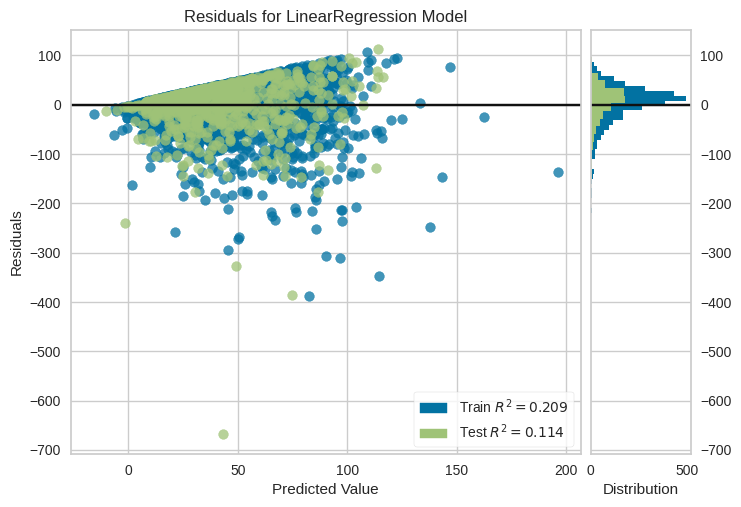

In [40]:
my_experiment.plot_model(lr, plot = 'residuals')

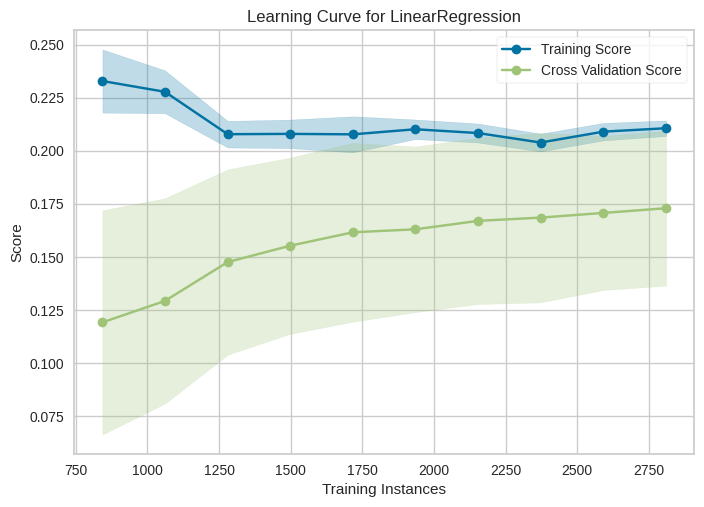

In [43]:
my_experiment.plot_model(lr, plot = 'learning')

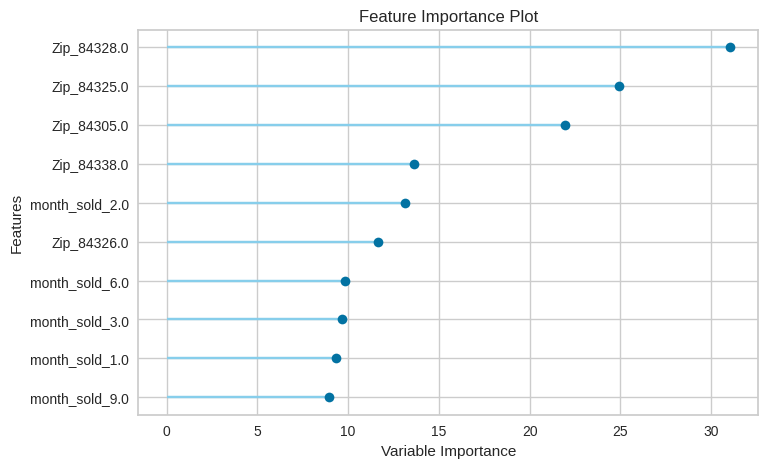

In [44]:
my_experiment.plot_model(lr, plot = 'feature')

In [45]:
holdout_pred= my_experiment.predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,32.1670,2638.1346,51.3628,0.1143,1.3021,3.5336


RMSE was lower on the holdout set at 51.36

In [46]:
holdout_pred

,Sold Price,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,DOM,prediction_label
1713,262400.0,2.0,123.0,No,SE,Cache,Conventional,4.0,3.0,2726.0,2016,84335,2018,8,1,16.0,38.541372
2144,299900.0,2.0,35.0,No,SE,Cache,Conventional,3.0,2.0,3386.0,2018,84319,2018,6,1,109.0,86.243863
1492,148000.0,0.0,152.0,No,NW,Cache,Conventional,2.0,2.0,1069.0,2001,84332,2019,4,1,6.0,21.879229
1258,238000.0,2.0,0.0,No,NW,Logan,Conventional,4.0,1.0,3656.0,1914,84321,2018,12,0,47.0,68.634602
3476,215000.0,2.0,0.0,No,SW,Cache,Conventional,4.0,2.0,2234.0,1926,84335,2018,6,0,44.0,41.391361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,289900.0,2.0,0.0,No,SW,Cache,Conventional,5.0,3.0,2581.0,2014,84321,2018,8,1,53.0,41.968847
3879,338000.0,2.0,0.0,Yes,SE,Cache,Conventional,5.0,4.0,3200.0,1998,84332,2018,10,0,83.0,27.906316
2686,235000.0,2.0,0.0,No,NE,Cache,Conventional,4.0,2.0,2009.0,1929,84339,2018,12,0,49.0,42.322559
3339,267900.0,2.0,35.0,Yes,SE,Cache,Conventional,2.0,2.0,2470.0,2019,84319,2019,7,1,128.0,69.707071


In [49]:
my_winning_model = my_experiment.finalize_model(lr)

In [50]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Sold Price', 'Garage Capacity',
                                             'HOA Fee', 'Total Bedrooms',
                                             'Total Bathrooms',
                                             'Total Square Feet'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Irregular Shape', 'Quadrant',
                                             'School District', 'Sold Terms',
                                             'Year Built', 'Zip', 'year_sold...
                                                                    'Terms',
                                                                    'Zip',
                                                                    'year_sold',
                                                                    'month_sold'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Year Built'],
                                    transformer=TargetEncoder(cols=['Year '
                                                                    'Built'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', LinearRegression(n_jobs=-1))])

In [51]:
unseen_pred = my_experiment.predict_model(my_winning_model, data=unseen_data)
unseen_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,30.8125,1835.9866,42.8484,0.1491,1.2196,3.2794


,Sold Price,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,DOM,prediction_label
0,274000.0,2.0,0.0,No,NW,Cache,Cash,7.0,3.0,2688.0,1996,84305,2018,7,0,4.0,16.004916
1,397000.0,3.0,100.0,No,NE,Cache,Conventional,5.0,4.0,3312.0,2014,84318,2020,10,1,1.0,51.639448
2,299900.0,2.0,0.0,No,NW,Cache,Conventional,4.0,2.0,2301.0,2000,84318,2020,2,1,3.0,26.574328
3,360000.0,2.0,0.0,No,NW,Cache,Conventional,5.0,3.0,2536.0,2002,84318,2020,10,1,4.0,26.218477
4,295000.0,2.0,0.0,Yes,SE,Cache,Conventional,5.0,2.0,2485.0,1986,84318,2019,6,0,7.0,30.304816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,375000.0,4.0,0.0,Yes,NE,Cache,Conventional,4.0,3.0,3364.0,2006,84339,2019,7,1,29.0,43.247337
202,700000.0,3.0,0.0,No,SW,Cache,Conventional,5.0,4.0,4034.0,2001,84339,2020,9,1,38.0,44.202397
203,207500.0,2.0,0.0,No,NW,Cache,FHA,3.0,1.0,1234.0,1903,84339,2019,9,0,99.0,21.101340
204,690000.0,4.0,600.0,No,SW,Cache,Conventional,5.0,4.0,3670.0,2013,84339,2020,9,1,323.0,74.034032


In [52]:
my_experiment.save_model(my_winning_model, 'HW3_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Sold Price', 'Garage Capacity',
                                              'HOA Fee', 'Total Bedrooms',
                                              'Total Bathrooms',
                                              'Total Square Feet'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Irregular Shape', 'Quadrant',
                                              'School District', 'Sold Terms',
                                              'Year Built', 'Zip', 'year_sold...
                                                                     'Terms',
                                                                     'Zip',
                                                                     'year_sold',
                                                    